In [10]:
import pandas as pd

data1 = pd.read_csv('testtrainval.txt', sep=" ", header=None)

data2 = pd.read_csv('testtrainval1.txt', sep=" ", header=None)

data = pd.merge(data1, data2)

import numpy as np

np.savetxt('np.txt', data.values, fmt='%s')

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(999)

In [18]:
import matplotlib.pyplot as plt

In [3]:
!pwd

/Users/JHZ/Desktop/VOCdevkit2007


In [21]:
df1 = pd.read_csv('roc_curve.txt', sep=" ")

In [5]:
df1

,threshold,tps,fps,nposes,mAP
0,0.0,287,27720,372,0.6166
1,0.1,282,105,372,0.6096
2,0.3,279,71,372,0.6021
3,0.5,277,71,372,0.5968
4,0.7,275,71,372,0.5920
5,0.9,275,71,372,0.5920


In [6]:
df1.tps.astype(float)/ df1.nposes

0    0.771505
1    0.758065
2    0.750000
3    0.744624
4    0.739247
5    0.739247
dtype: float64

In [7]:
df1['tpr'] = df1.tps.astype(float)/ df1.nposes

In [8]:
df1['pre'] = df1.tps.astype(float)/ (df1.tps + df1.fps)

In [9]:
df1

,threshold,tps,fps,nposes,mAP,tpr,pre
0,0.0,287,27720,372,0.6166,0.771505,0.010247
1,0.1,282,105,372,0.6096,0.758065,0.728682
2,0.3,279,71,372,0.6021,0.750000,0.797143
3,0.5,277,71,372,0.5968,0.744624,0.795977
4,0.7,275,71,372,0.5920,0.739247,0.794798
5,0.9,275,71,372,0.5920,0.739247,0.794798


In [10]:
legends = np.array(df1.threshold[1:])

In [11]:
tpr = np.array(df1.tpr[1:])

In [12]:
fps = np.array(df1.fps[1:])

In [13]:
pres = np.array(df1.pre[1:])

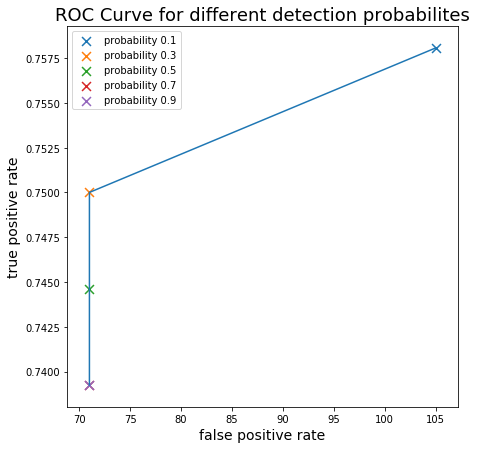

In [20]:
fig = plt.figure(figsize=[7, 7])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(fps, tpr)
for i in xrange(0,5):
    ax1.scatter(fps[i], tpr[i], label='probability ' + str(legends[i]), marker='x', s=80)
#ax1.set_xlim(70,110)
#ax1.set_ylim(0.73,0.76)
ax1.set_xlabel('false positive rate', fontsize=14)
ax1.set_ylabel('true positive rate', fontsize=14)
ax1.set_title('ROC Curve for different detection probabilites', fontsize=18)
plt.legend()
plt.show()